## Linear Sturm-Liouville Operator


### Formulation:

$L[u(x)] = f(x) \qquad x \in [0,10]$

$-[p(x) \; u_{x}]_{x} + q(x) \; u(x) = f(x)$

$p(x) = 0.5 \; sin(x) + 0.1 \; sin(12 x) + 0.25 \; cos(4 x) + 2$

$q(x) = 0.4 \; sin(3 x) + 0.15 \; cos(8 x) + 1$

### Forcing Library
I = {0.1, 0.3, 0.5, 0.7, 0.9}

J = {2, 4, 6, 8, 10}

K = {0.5, 0.7, 0.9, 1.1, 1.3, 1.5}

F = {$f_j(i_a, j_b, k_c): i_a*sin(j_b*x)+k_c), i_a*cos(j_b*x+0.5)+k_c)$}, $\; \forall \; i_a \in I, j_b \in J, k_c \in K$

In [1]:
%load_ext autoreload
%autoreload 2

# Python imports
import pickle

# Third-Party Imports
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt

# Package Imports
from sindy_bvp.bvp_solver import IVPSolver, BVPShooter, sturm_liouville_function, get_forcings

In [2]:
# file stem for saving data
save_stem = "./data/S1-LSL-"

####################################
## SET UP x, p(x), q(x), and f(x) ##
####################################

# Define the independent variable bounds and discrete increments
x_min = 0.0; x_max = 10; dx = 0.01;
x_array = np.linspace(x_min, x_max, int((x_max-x_min)/dx)+1)

## Define p(x), p_x(x), and q(x)
a=12
b=4
p = lambda x: 0.5*sin(x) + 0.1*sin(a*x) + 0.25*cos(b*x) + 2
p_x = lambda x: 0.5*cos(x) + 0.1*a*cos(a*x) - 0.25*b*sin(b*x)
q = lambda x: 0.4*sin(3*x) + 0.15*cos(8*x) + 1

# Specify initial values to start with for solving S-L BVPs via shooting method
ic = [0,0.5] # Selected 0.5 as initial du/dx since solutions are order(1)

# Create a library of forcing functions to use
i_set = np.arange(0.1,1.1,0.2)
j_set = np.arange(2,11,2)
k_set = np.arange(0.5,1.6,0.2)
forcings = get_forcings(i_set=i_set, j_set=j_set, k_set=k_set)
            
print("Forcing library contains",len(forcings), "functions.")
print("I set:", i_set)
print("J set:", j_set)
print("K set:", k_set)

Forcing library contains 300 functions.
I set: [0.1 0.3 0.5 0.7 0.9]
J set: [ 2  4  6  8 10]
K set: [0.5 0.7 0.9 1.1 1.3 1.5]


In [3]:
%%time

#####################################################
## Solve the Sturm-Liouville Differential Equation ##
#####################################################

# Prepare the BVP shooting method
ivp_solver = IVPSolver(t_min=x_min, t_max=x_max, dt=dx)

bvp_solver = BVPShooter(ivp_solver,
                        ic_index = 1,
                        attempts = 50,
                        bv_tolerance = 0.001)

# Create function(x,y,f) for the differential equation, specifying p(x), p_x(x), and q(x)
sl_func = lambda x, y, f: sturm_liouville_function(x, y, p=p(x), p_x = p_x(x), q=q(x), f=f)

# Use the shooting method to generate the solutions
ode_sols, used_fs = bvp_solver.generate_multiple_experiments(diffeq = sl_func, 
                                                             forcings = forcings, 
                                                             init_vals_list = [ic], 
                                                             verbose=True)

0 status = complete, 2 status = failed to converge
Solution statuses: 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 
Created 276 solutions.
CPU times: user 18min 35s, sys: 686 ms, total: 18min 36s
Wall time: 18min 35s


In [4]:
#####################
## Pickle the data ##
#####################
# Pickle the x array
pickle.dump(x_array, open(save_stem+"x.pickle", "wb"))

# Pickle the solutions
pickle.dump(ode_sols, open(save_stem+"sols.pickle", "wb"))

# Vectorize the forcing functions and pickle the forcing vectors
forcings = [f(x_array) for f in used_fs]
pickle.dump(forcings, open(save_stem+"fs.pickle", "wb"))

# Vectorize, organize, and pickle the Sturm-Liouville coefficients
coeffs = { 'p': np.vectorize(p)(x_array),
           'p_x': np.vectorize(p_x)(x_array),
           'q': np.vectorize(q)(x_array)}
pickle.dump(coeffs, open(save_stem+"coeffs.pickle", "wb"))

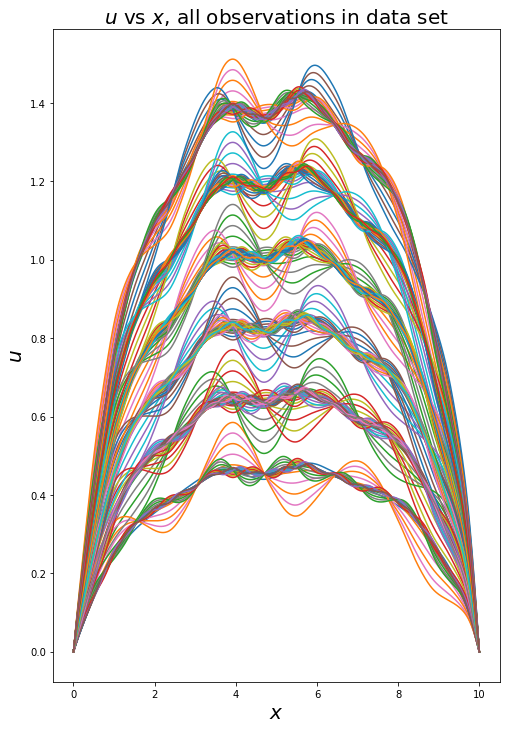

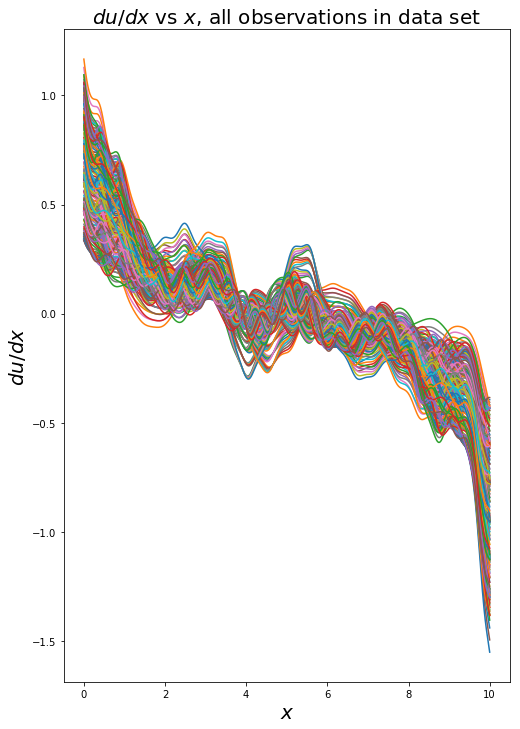

In [5]:
#############################
## Show the generated data ##
#############################

# Plot u data sets
plt.figure(figsize=(8,12))
for sol in ode_sols:
    plt.plot(sol.t, sol.y[0]) # u vs x
fs = 20
plt.title("$u$ vs $x$, all observations in data set", fontsize=fs)
plt.ylabel("$u$", fontsize=fs)
plt.xlabel("$x$", fontsize=fs)

# And du/dx data sets
plt.figure(figsize=(8,12))
for sol in ode_sols:
    plt.plot(sol.t, sol.y[1]) # du/dx vs x
fs = 20
plt.title("$du/dx$ vs $x$, all observations in data set", fontsize=fs)
plt.ylabel("$du/dx$", fontsize=fs)
plt.xlabel("$x$", fontsize=fs)

# Show the plots
plt.show()

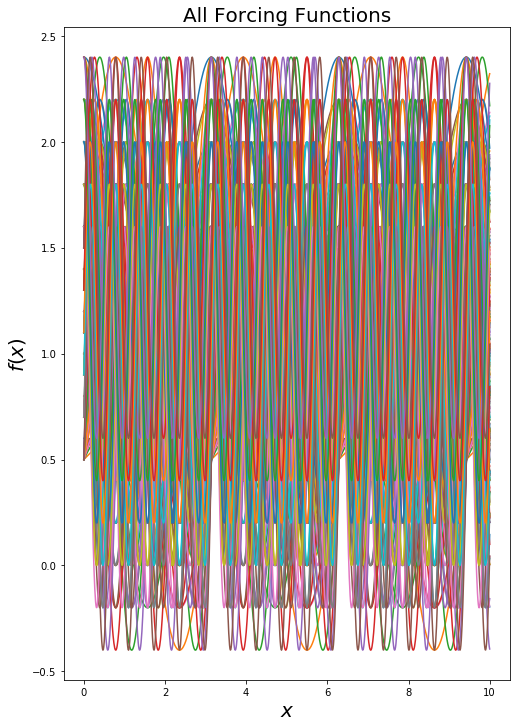

In [6]:
# And forcings
plt.figure(figsize=(8,12))
for f in forcings:
    plt.plot(x_array, f) # du/dx vs x
fs = 20
plt.title("All Forcing Functions", fontsize=fs)
plt.ylabel("$f(x)$", fontsize=fs)
plt.xlabel("$x$", fontsize=fs)
plt.show()